In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from experiment_util import *

In [20]:
plt.style.use('default')
plt.style.use('seaborn-colorblind')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
SMALL_SIZE = 16
MEDIUM_SIZE = 22
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=26)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Checkerboard 2

In [41]:
## Checkerboard2
root_filename = './checker2-1/'
M, cand, select_method, B, num_al_iters, runs_ = 50, 'full', 'top', 1, 200, [1,2,3,4,5]
tau, gamma = 0.1, 0.1




mc_gr_runs = get_data_from_runs('mc', 'gr', M, 0.1, 0.1, cand, select_method, B, num_al_iters, runs=runs_, \
                                                                     root_filename=root_filename)
avg_mc_gr, std_mc_gr = get_avg_acc_from_runs_dict(mc_gr_runs, runs=runs_)
avg_mc_log, std_mc_log = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'log', M, tau, gamma, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_mc_pn, std_mc_pn = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'probitnorm', M, tau, gamma, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_rand_gr, std_rand_gr = get_avg_acc_from_runs_dict(get_data_from_runs('rand', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_gr, std_unc_gr = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_log, std_unc_log = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'log', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_pn, std_unc_pn = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'probitnorm', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_vopt_gr, std_vopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('vopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_sopt_gr, std_sopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('sopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

# print(list(mc_gr_runs.keys()))



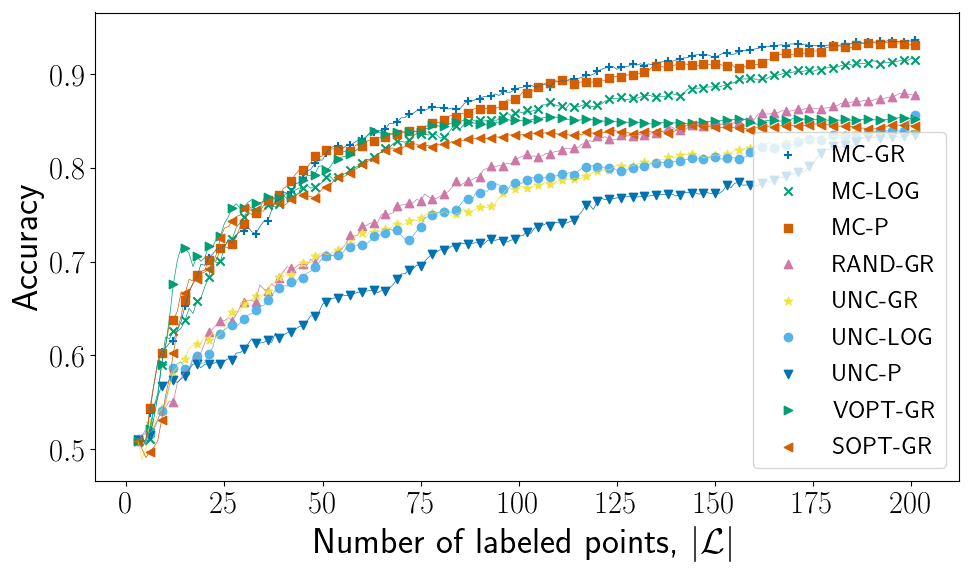

In [44]:
tot_iters = 200

dom = [len(mc_gr_runs[1]['init_labeled']) + B*i for i in range(len(avg_mc_gr[:tot_iters]))]
plt.figure(figsize=(10,6))
plt.scatter(dom[::3], avg_mc_gr[:tot_iters][::3], marker='+', label='MC-GR')
plt.plot(dom, avg_mc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom[::3], avg_mc_log[:tot_iters][::3], marker='x', label='MC-LOG')
plt.plot(dom, avg_mc_log[:tot_iters], linewidth=0.5)
plt.scatter(dom[::3], avg_mc_pn[:tot_iters][::3], marker='s', label='MC-P')
plt.plot(dom, avg_mc_pn[:tot_iters], linewidth=0.5)
plt.scatter(dom[::3], avg_rand_gr[:tot_iters][::3], marker='^',  label='RAND-GR')
plt.plot(dom, avg_rand_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom[::3], avg_unc_gr[:tot_iters][::3], marker='*', label='UNC-GR')
plt.plot(dom, avg_unc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom[::3], avg_unc_log[:tot_iters][::3], marker='o',label='UNC-LOG')
plt.plot(dom, avg_unc_log[:tot_iters],  linewidth=0.5)
plt.scatter(dom[::3], avg_unc_pn[:tot_iters][::3], marker='v',  label='UNC-P')
plt.plot(dom, avg_unc_pn[:tot_iters],linewidth=0.5)
plt.scatter(dom[::3], avg_vopt_gr[:tot_iters][::3], marker='>', label='VOPT-GR')
plt.plot(dom, avg_vopt_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom[::3], avg_sopt_gr[:tot_iters][::3], marker='<', label='SOPT-GR')
plt.plot(dom, avg_sopt_gr[:tot_iters], linewidth=0.5)
plt.legend()
#plt.title("Checkerboard-2 Results")
#plt.xlabel("Number of labeled points")
plt.xlabel("Number of labeled points, $|\mathcal{L}|$")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig(root_filename+'acc-plot.pdf')
plt.show()

In [6]:
print(mc_gr_runs[1]['init_labeled'])

[349, 934, 1374]


In [46]:
## Checkerboard2
root_filename = './checker2-5/'
M, cand, select_method, B, num_al_iters, runs_ = 50, 'rand', 'top', 5, 100, [1,2,3,4,5]
tau, gamma = 0.1, 0.1




mc_gr_runs = get_data_from_runs('mc', 'gr', M, 0.1, 0.1, cand, select_method, B, num_al_iters, runs=runs_, \
                                                                     root_filename=root_filename)
avg_mc_gr, std_mc_gr = get_avg_acc_from_runs_dict(mc_gr_runs, runs=runs_)
avg_mc_log, std_mc_log = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'log', M, tau, gamma, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_mc_pn, std_mc_pn = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'probitnorm', M, tau, gamma, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_rand_gr, std_rand_gr = get_avg_acc_from_runs_dict(get_data_from_runs('rand', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_gr, std_unc_gr = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_log, std_unc_log = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'log', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_pn, std_unc_pn = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'probitnorm', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_vopt_gr, std_vopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('vopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_sopt_gr, std_sopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('sopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)




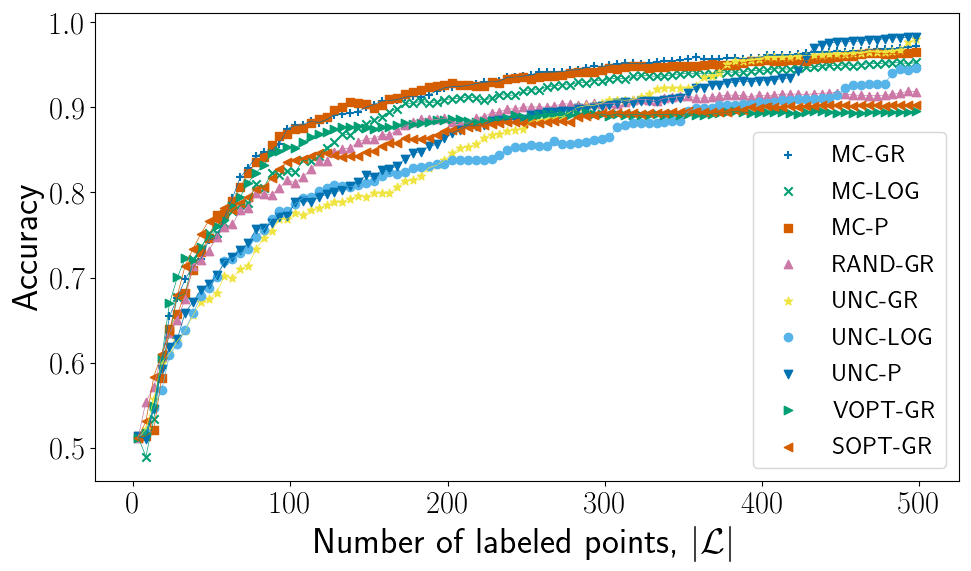

In [51]:
tot_iters = 100

dom = [len(mc_gr_runs[1]['init_labeled']) + B*i for i in range(len(avg_mc_gr[:tot_iters]))]
plt.figure(figsize=(10,6))
plt.scatter(dom, avg_mc_gr[:tot_iters], marker='+', label='MC-GR')
plt.plot(dom, avg_mc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_mc_log[:tot_iters], marker='x', label='MC-LOG')
plt.plot(dom, avg_mc_log[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_mc_pn[:tot_iters], marker='s', label='MC-P')
plt.plot(dom, avg_mc_pn[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_rand_gr[:tot_iters], marker='^',  label='RAND-GR')
plt.plot(dom, avg_rand_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_gr[:tot_iters], marker='*', label='UNC-GR')
plt.plot(dom, avg_unc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_log[:tot_iters], marker='o',label='UNC-LOG')
plt.plot(dom, avg_unc_log[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_unc_pn[:tot_iters], marker='v',  label='UNC-P')
plt.plot(dom, avg_unc_pn[:tot_iters],linewidth=0.5)
plt.scatter(dom, avg_vopt_gr[:tot_iters], marker='>', label='VOPT-GR')
plt.plot(dom, avg_vopt_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_sopt_gr[:tot_iters], marker='<', label='SOPT-GR')
plt.plot(dom, avg_sopt_gr[:tot_iters], linewidth=0.5)
plt.legend()
#plt.title("Checkerboard-2 Results")
#plt.xlabel("Number of labeled points")
plt.xlabel("Number of labeled points, $|\mathcal{L}|$")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig(root_filename+'acc-plot.pdf')
plt.show()

In [53]:
print(matplotlib.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Checkerboard-3

In [52]:
## Checkerboard3
root_filename = './checker3/'
M, cand, select_method, B, num_al_iters, runs_ = 50, 'rand', 'top', 5, 100, [1,2,3,4,5]
tau, gamma = 0.1, 0.1
tau_ce, gamma_ce = 0.05, 0.01




mc_gr_runs = get_data_from_runs('mc', 'gr', M, 0.1, 0.1, cand, select_method, B, num_al_iters, runs=runs_, \
                                                                     root_filename=root_filename)
avg_mc_gr, std_mc_gr = get_avg_acc_from_runs_dict(mc_gr_runs, runs=runs_)
avg_mc_ce, std_mc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_rand_gr, std_rand_gr = get_avg_acc_from_runs_dict(get_data_from_runs('rand', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_gr, std_unc_gr = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_unc_ce, std_unc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_vopt_gr, std_vopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('vopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_sopt_gr, std_sopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('sopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_mcg_ce, std_mcg_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mcgreedy', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)




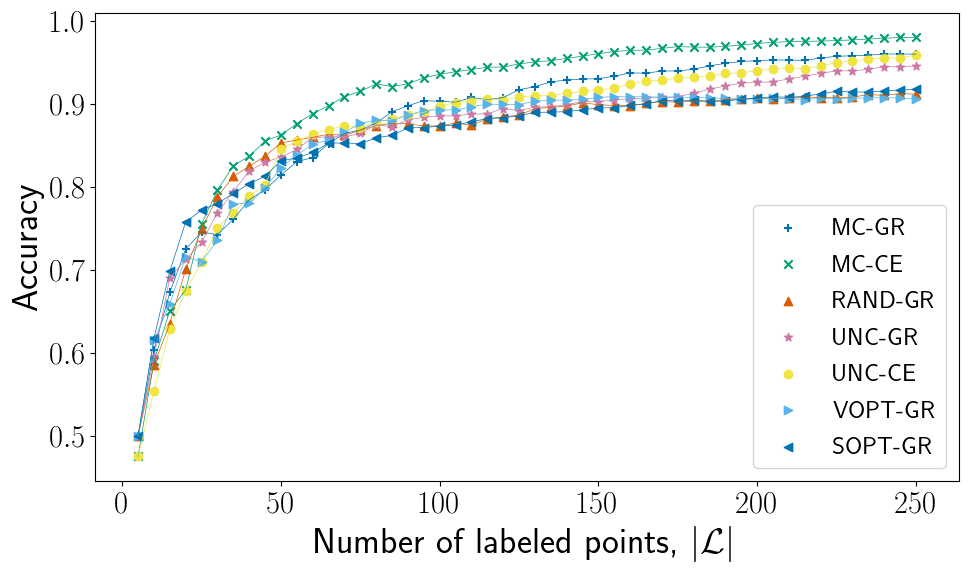

In [54]:
tot_iters = 50

dom = [len(mc_gr_runs[1]['init_labeled']) + B*i for i in range(len(avg_mc_gr[:tot_iters]))]
plt.figure(figsize=(10,6))
plt.scatter(dom, avg_mc_gr[:tot_iters], marker='+', label='MC-GR')
plt.plot(dom, avg_mc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_mcg_ce[:tot_iters], marker='x', label='MC-CE')
plt.plot(dom, avg_mcg_ce[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_rand_gr[:tot_iters], marker='^',  label='RAND-GR')
plt.plot(dom, avg_rand_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_gr[:tot_iters], marker='*', label='UNC-GR')
plt.plot(dom, avg_unc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_ce[:tot_iters], marker='o',label='UNC-CE')
plt.plot(dom, avg_unc_ce[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_vopt_gr[:tot_iters], marker='>', label='VOPT-GR')
plt.plot(dom, avg_vopt_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_sopt_gr[:tot_iters], marker='<', label='SOPT-GR')
plt.plot(dom, avg_sopt_gr[:tot_iters], linewidth=0.5)
# plt.scatter(dom, avg_mcg_ce[:tot_iters], marker='x', label='MCG-CE')
# plt.plot(dom, avg_mcg_ce[:tot_iters], linewidth=0.5)
plt.legend()
plt.xlabel("Number of labeled points, $|\mathcal{L}|$")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig(root_filename+'acc-plot.pdf')
plt.show()

# MNIST-10

In [22]:

root_filename = './mnist-10-bs/'
M, cand, select_method, B, num_al_iters, runs_ = 50, 'rand', 'top', 5, 100, [1,2,3,4,5]
tau, gamma = 0.1, 0.1
tau_ce, gamma_ce = 0.05, 0.01




mc_gr_runs = get_data_from_runs('mc', 'gr', M, 0.1, 0.1, cand, select_method, B, num_al_iters, runs=runs_, \
                                                                     root_filename=root_filename)
avg_mc_gr, std_mc_gr = get_avg_acc_from_runs_dict(mc_gr_runs, runs=runs_)
avg_mc_ce, std_mc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_rand_gr, std_rand_gr = get_avg_acc_from_runs_dict(get_data_from_runs('rand', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_gr, std_unc_gr = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_unc_ce, std_unc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_vopt_gr, std_vopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('vopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
# print(list(mc_gr_runs.keys()))



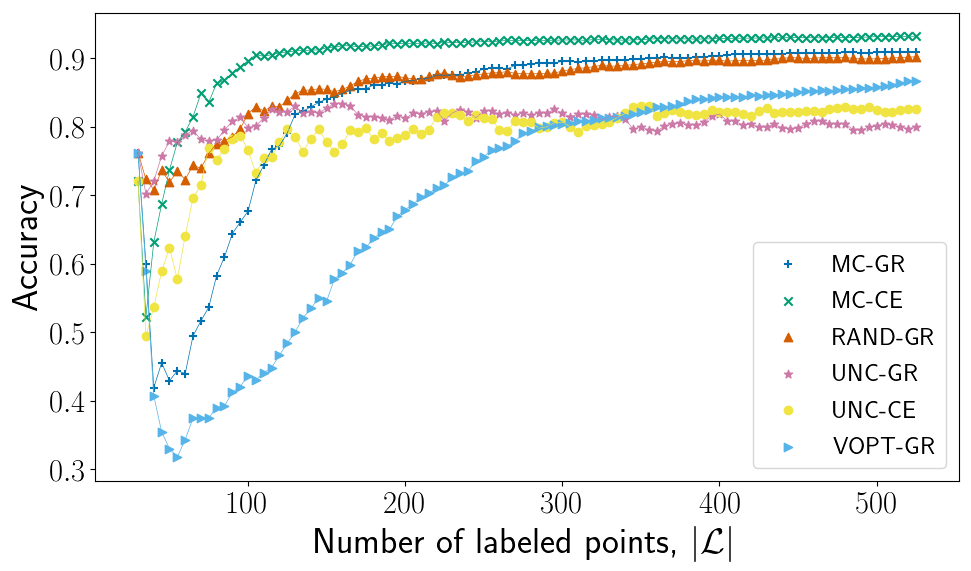

In [25]:
tot_iters = 100

dom = [len(mc_gr_runs[1]['init_labeled']) + B*i for i in range(len(avg_mc_gr[:tot_iters]))]
plt.figure(figsize=(10,6))
plt.scatter(dom, avg_mc_gr[:tot_iters], marker='+', label='MC-GR')
plt.plot(dom, avg_mc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_mc_ce[:tot_iters], marker='x', label='MC-CE')
plt.plot(dom, avg_mc_ce[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_rand_gr[:tot_iters], marker='^',  label='RAND-GR')
plt.plot(dom, avg_rand_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_gr[:tot_iters], marker='*', label='UNC-GR')
plt.plot(dom, avg_unc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_ce[:tot_iters], marker='o',label='UNC-CE')
plt.plot(dom, avg_unc_ce[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_vopt_gr[:tot_iters], marker='>',label='VOPT-GR')
plt.plot(dom, avg_vopt_gr[:tot_iters],  linewidth=0.5)
plt.legend()
plt.xlabel("Number of labeled points, $|\mathcal{L}|$")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig(root_filename+'acc-plot.pdf')
plt.show()

In [55]:

root_filename = './mnist-10-bs/'
M, cand, select_method, B, num_al_iters, runs_ = 50, 'rand', 'top', 5, 100, [1,2,3,4,5]
tau, gamma = 0.1, 0.1
tau_ce, gamma_ce = 0.05, 0.01




mc_gr_runs = get_data_from_runs('mc', 'gr', M, 0.1, 0.1, cand, select_method, B, num_al_iters, runs=runs_, \
                                                                     root_filename=root_filename)
avg_mc_gr, std_mc_gr = get_avg_acc_from_runs_dict(mc_gr_runs, runs=runs_)
avg_mc_ce, std_mc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_rand_gr, std_rand_gr = get_avg_acc_from_runs_dict(get_data_from_runs('rand', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_gr, std_unc_gr = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_unc_ce, std_unc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_vopt_gr, std_vopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('vopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_sopt_gr, std_sopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('sopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_mcg_ce, std_mcg_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mcgreedy', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
# print(list(mc_gr_runs.keys()))



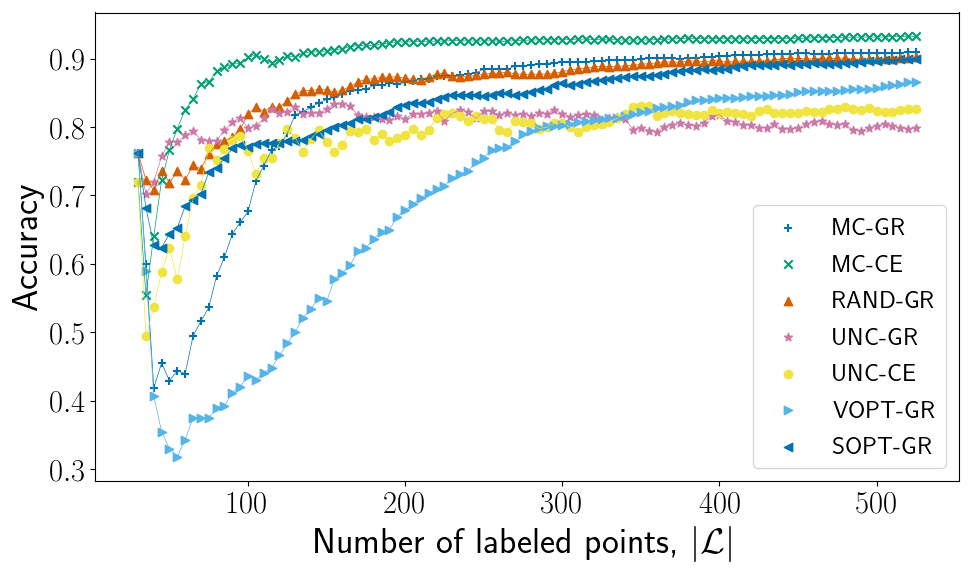

In [57]:
tot_iters = 100

dom = [len(mc_gr_runs[1]['init_labeled']) + B*i for i in range(len(avg_mc_gr[:tot_iters]))]
plt.figure(figsize=(10,6))
plt.scatter(dom, avg_mc_gr[:tot_iters], marker='+', label='MC-GR')
plt.plot(dom, avg_mc_gr[:tot_iters], linewidth=0.5)
# plt.scatter(dom, avg_mc_ce[:tot_iters], marker='x', label='MC-CE')
# plt.plot(dom, avg_mc_ce[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_mcg_ce[:tot_iters], marker='x',label='MC-CE')
plt.plot(dom, avg_mcg_ce[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_rand_gr[:tot_iters], marker='^',  label='RAND-GR')
plt.plot(dom, avg_rand_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_gr[:tot_iters], marker='*', label='UNC-GR')
plt.plot(dom, avg_unc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_ce[:tot_iters], marker='o',label='UNC-CE')
plt.plot(dom, avg_unc_ce[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_vopt_gr[:tot_iters], marker='>',label='VOPT-GR')
plt.plot(dom, avg_vopt_gr[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_sopt_gr[:tot_iters], marker='<',label='SOPT-GR')
plt.plot(dom, avg_sopt_gr[:tot_iters],  linewidth=0.5)

plt.legend()
plt.xlabel("Number of labeled points, $|\mathcal{L}|$")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig(root_filename+'acc-plot.pdf')
plt.show()

## Salinas

In [58]:
root_filename = './salinas/'
M, cand, select_method, B, num_al_iters, runs_ = 50, 'rand', 'top', 5, 100, [1,2,3,4,5]
tau, gamma = 0.1, 0.1
tau_ce, gamma_ce = 0.05, 0.01




mc_gr_runs = get_data_from_runs('mc', 'gr', M, 0.1, 0.1, cand, select_method, B, num_al_iters, runs=runs_, \
                                                                     root_filename=root_filename)
avg_mc_gr, std_mc_gr = get_avg_acc_from_runs_dict(mc_gr_runs, runs=runs_)
avg_mc_ce, std_mc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_rand_gr, std_rand_gr = get_avg_acc_from_runs_dict(get_data_from_runs('rand', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_gr, std_unc_gr = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_ce, std_unc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_vopt_gr, std_vopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('vopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_sopt_gr, std_sopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('sopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_mcg_ce, std_mcg_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mcgreedy', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
# print(list(mc_gr_runs.keys()))



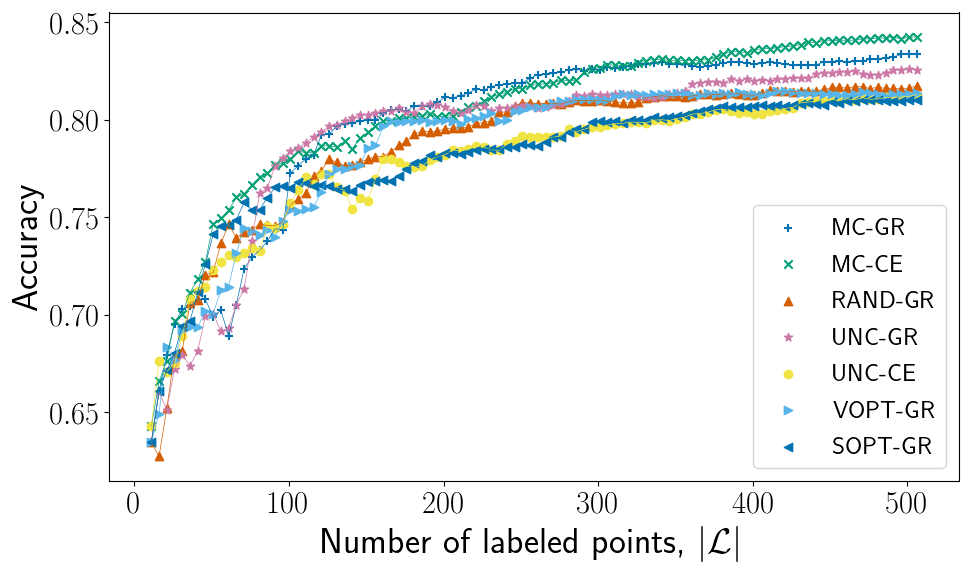

In [59]:
tot_iters = 100

dom = [len(mc_gr_runs[1]['init_labeled']) + B*i for i in range(len(avg_mc_gr[:tot_iters]))]
plt.figure(figsize=(10,6))
plt.scatter(dom, avg_mc_gr[:tot_iters], marker='+', label='MC-GR')
plt.plot(dom, avg_mc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_mcg_ce[:tot_iters], marker='x', label='MC-CE')
plt.plot(dom, avg_mcg_ce[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_rand_gr[:tot_iters], marker='^',  label='RAND-GR')
plt.plot(dom, avg_rand_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_gr[:tot_iters], marker='*', label='UNC-GR')
plt.plot(dom, avg_unc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_ce[:tot_iters], marker='o',label='UNC-CE')
plt.plot(dom, avg_unc_ce[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_vopt_gr[:tot_iters], marker='>', label='VOPT-GR')
plt.plot(dom, avg_vopt_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_sopt_gr[:tot_iters], marker='<', label='SOPT-GR')
plt.plot(dom, avg_sopt_gr[:tot_iters], linewidth=0.5)
# plt.scatter(dom, avg_mcg_ce[:tot_iters], marker='x', label='MC-CE')
# plt.plot(dom, avg_mcg_ce[:tot_iters], linewidth=0.5)
plt.legend()
plt.xlabel("Number of labeled points, $|\mathcal{L}|$")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig(root_filename+'acc-plot.pdf')
plt.show()

## Urban

In [60]:
root_filename = './urban/'
M, cand, select_method, B, num_al_iters, runs_ = 50, 'rand', 'top', 5, 100, [1,2,3,4,5]
tau, gamma = 0.1, 0.1
tau_ce, gamma_ce = 0.05, 0.01




mc_gr_runs = get_data_from_runs('mc', 'gr', M, 0.1, 0.1, cand, select_method, B, num_al_iters, runs=runs_, \
                                                                     root_filename=root_filename)
avg_mc_gr, std_mc_gr = get_avg_acc_from_runs_dict(mc_gr_runs, runs=runs_)
avg_mc_ce, std_mc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mc', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_rand_gr, std_rand_gr = get_avg_acc_from_runs_dict(get_data_from_runs('rand', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_gr, std_unc_gr = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_unc_ce, std_unc_ce = get_avg_acc_from_runs_dict(get_data_from_runs('uncertainty', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)

avg_vopt_gr, std_vopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('vopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_sopt_gr, std_sopt_gr = get_avg_acc_from_runs_dict(get_data_from_runs('sopt', 'gr', M, tau, gamma, cand, \
                                                                     select_method,B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
avg_mcg_ce, std_mcg_ce = get_avg_acc_from_runs_dict(get_data_from_runs('mcgreedy', 'ce', M, tau_ce, gamma_ce, cand, \
                                                                     select_method, B, num_al_iters, runs=runs_, 
                                                                     root_filename=root_filename), \
                                                  runs=runs_)
# print(list(mc_gr_runs.keys()))



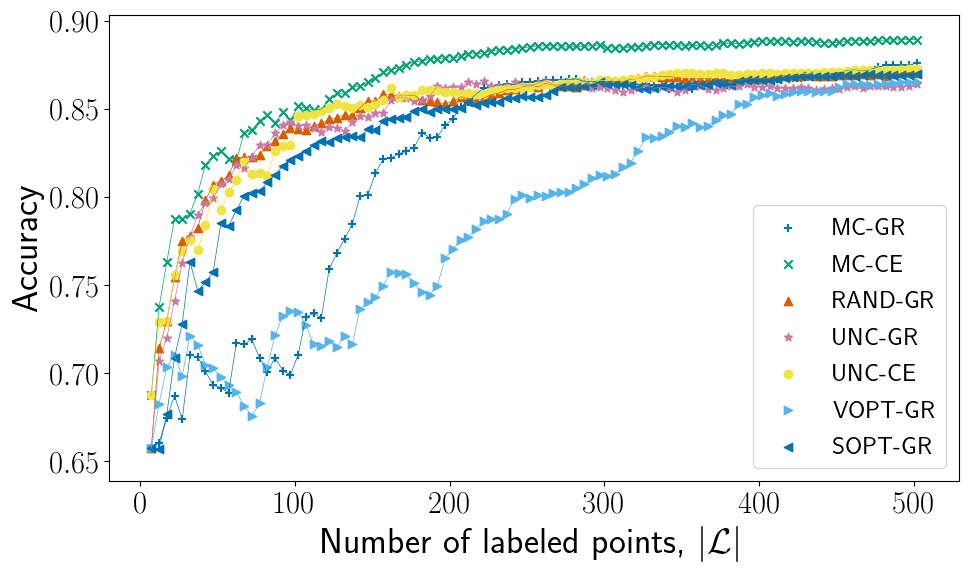

In [62]:
tot_iters = 100

dom = [len(mc_gr_runs[1]['init_labeled']) + B*i for i in range(len(avg_mc_gr[:tot_iters]))]
plt.figure(figsize=(10,6))
plt.scatter(dom, avg_mc_gr[:tot_iters], marker='+', label='MC-GR')
plt.plot(dom, avg_mc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_mcg_ce[:tot_iters], marker='x', label='MC-CE')
plt.plot(dom, avg_mcg_ce[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_rand_gr[:tot_iters], marker='^',  label='RAND-GR')
plt.plot(dom, avg_rand_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_gr[:tot_iters], marker='*', label='UNC-GR')
plt.plot(dom, avg_unc_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_unc_ce[:tot_iters], marker='o',label='UNC-CE')
plt.plot(dom, avg_unc_ce[:tot_iters],  linewidth=0.5)
plt.scatter(dom, avg_vopt_gr[:tot_iters], marker='>', label='VOPT-GR')
plt.plot(dom, avg_vopt_gr[:tot_iters], linewidth=0.5)
plt.scatter(dom, avg_sopt_gr[:tot_iters], marker='<', label='SOPT-GR')
plt.plot(dom, avg_sopt_gr[:tot_iters], linewidth=0.5)
# plt.scatter(dom, avg_mcg_ce[:tot_iters], marker='x', label='MCG-CE')
# plt.plot(dom, avg_mcg_ce[:tot_iters], linewidth=0.5)
plt.legend()
plt.xlabel("Number of labeled points, $|\mathcal{L}|$")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig(root_filename+'acc-plot.pdf')
plt.show()